In [1]:
from linares_plot import *

In [2]:
### Recording, se genera txt

In [3]:
file ='recording3.txt'
file ='rester.txt'

In [4]:
data = pd.read_csv(file, delimiter=',', header=None)

In [5]:
### 0,0 es arriba a la izquierda!!

In [6]:
### Remove NANs

In [7]:
print(len(data))
data.iloc[:,2].unique()

658


array(['statuscode:200', nan], dtype=object)

In [8]:
df_ = data[data.iloc[:,2]=='statuscode:200']
df_ = df_.reset_index()

In [9]:
df_.head(5)

index                      0              1               2  \
0      0  {"category":"tracker"  request:"get"  statuscode:200   
1      1  {"category":"tracker"  request:"get"  statuscode:200   
2      2  {"category":"tracker"  request:"get"  statuscode:200   
3      3  {"category":"tracker"  request:"get"  statuscode:200   
4      4  {"category":"tracker"  request:"get"  statuscode:200   

                                      3            4         5  \
0  values:{"frame":{"avg":{"x":527.6405  y:280.0233}  fix:true   
1  values:{"frame":{"avg":{"x":530.9612  y:280.8741}  fix:true   
2  values:{"frame":{"avg":{"x":531.5813  y:281.3464}  fix:true   
3  values:{"frame":{"avg":{"x":531.8276  y:281.7735}  fix:true   
4  values:{"frame":{"avg":{"x":532.2375  y:282.2017}  fix:true   

                              6            7                    8  ...  \
0  lefteye:{"avg":{"x":575.9943  y:290.9440}  pcenter:{"x":0.3130  ...   
1  lefteye:{"avg":{"x":575.8290  y:290.1574}  pcenter:{"x":0.3130  ...   
2  lefteye:{"avg":{"x":576.2083  y:290.2104}  pcenter:{"x":0.3129  ...   
3  lefteye:{"avg":{"x":576.1766  y:290.5203}  pcenter:{"x":0.3128  ...   
4  lefteye:{"avg":{"x":576.0515  y:290.0358}  pcenter:{"x":0.3128  ...   

                              15           16                   17         18  \
0  righteye:{"avg":{"x":480.7565  y:279.9606}  pcenter:{"x":0.4735  y:0.6278}   
1  righteye:{"avg":{"x":481.9774  y:279.1297}  pcenter:{"x":0.4735  y:0.6276}   
2  righteye:{"avg":{"x":482.7520  y:279.1657}  pcenter:{"x":0.4734  y:0.6277}   
3  righteye:{"avg":{"x":482.5212  y:279.2290}  pcenter:{"x":0.4733  y:0.6277}   
4  righteye:{"avg":{"x":482.6854  y:279.6126}  pcenter:{"x":0.4733  y:0.6278}   

              19                 20            21       22              23  \
0  psize:17.8942  raw:{"x":488.7872  y:293.0813}}  state:7  time:753147758   
1  psize:17.5901  raw:{"x":501.1154  y:261.4662}}  state:7  time:753147791   
2  psize:17.7342  raw:{"x":491.3210  y:276.2978}}  state:7  time:753147824   
3  psize:17.9127  raw:{"x":480.4534  y:272.7168}}  state:7  time:753147858   
4  psize:17.6635  raw:{"x":482.8904  y:284.1649}}  state:7  time:753147891   

                                       24  
0  timestamp:"2022-02-24 19:00:22.126"}}}  
1  timestamp:"2022-02-24 19:00:22.159"}}}  
2  timestamp:"2022-02-24 19:00:22.192"}}}  
3  timestamp:"2022-02-24 19:00:22.226"}}}  
4  timestamp:"2022-02-24 19:00:22.259"}}}  

[5 rows x 26 columns]

4,5 --> xy average  
7,8 --> xy left eye  
9,10 --> pcenter left eye  
11 --> psize left  
16,17 --> xy right eye  
18,19 --> pcenter right eye  
20 --> psize left  


In [10]:
pos_x = []
pos_y = []
time_ = []
for i in range(len(df_)):
    x = float(df_.iloc[:,4][i].split(':')[-1])
    pos_x.append(x)
    y = float(df_.iloc[:,5][i].split(':')[1].split('}')[0])
    pos_y.append(y)
    time = df_.iloc[:,-1][i].split(' ')[-1].split('}')[0].split('"')[0]
    time_.append(time)

In [11]:
df = pd.DataFrame({'x':pos_x, 'y':pos_y, 'time': time_})
df.head()

time         x         y
0  19:00:22.126  527.6405  280.0233
1  19:00:22.159  530.9612  280.8741
2  19:00:22.192  531.5813  281.3464
3  19:00:22.226  531.8276  281.7735
4  19:00:22.259  532.2375  282.2017

In [12]:
df = df.loc[df['x']!=0]
df = df.loc[df['y']!=0]

In [13]:
len(df)

591

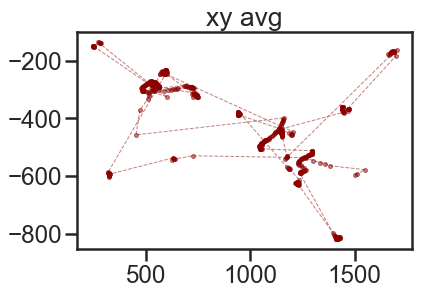

In [31]:
plt.title('xy avg')
plt.plot(df.x, 1-df.y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

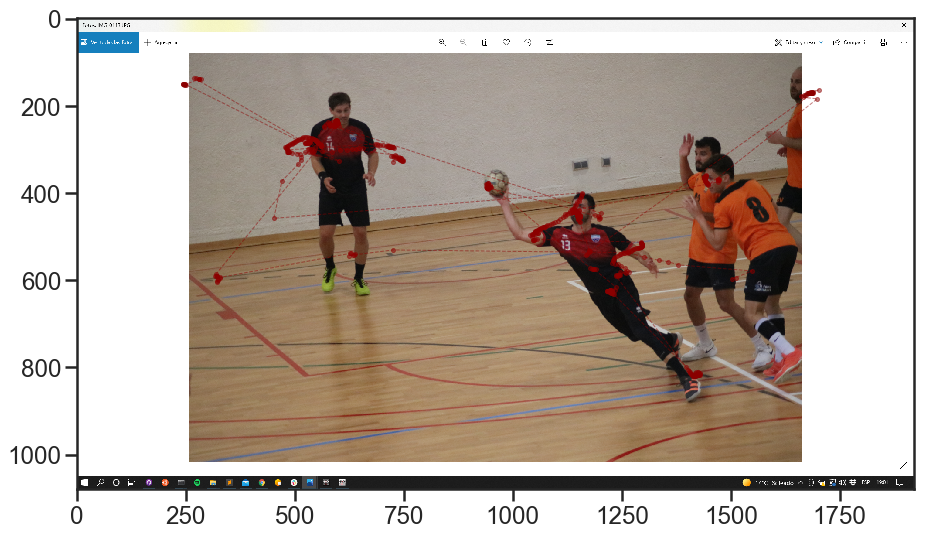

In [30]:
import matplotlib.image as mpimg
img = mpimg.imread('seen2.png')
plt.figure(figsize=(15,10))
imgplot = plt.imshow(img)
plt.plot(df.x, df.y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

In [16]:
D = np.shape(img)[1]/100, np.shape(img)[0]/100

In [17]:
df['x_int'] = df['x'].astype(int)
df['y_int'] = df['y'].astype(int)

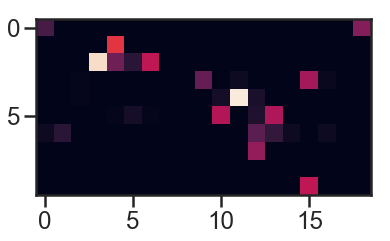

In [18]:
heatmap, xedges, yedges = np.histogram2d(df.x_int, df.y_int, bins=D)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [41]:
### Heatmap

Screen resolution = 1920 x 1080  
https://github.com/TobiasRoeddiger/GazePointHeatMap  

In [209]:
import os
import argparse
import csv
import numpy
import matplotlib
from matplotlib import pyplot, image

def draw_display(dispsize, imagefile=None):
    """Returns a matplotlib.pyplot Figure and its axes, with a size of
    dispsize, a black background colour, and optionally with an image drawn
    onto it

    arguments

    dispsize		-	tuple or list indicating the size of the display,
                    e.g. (1024,768)

    keyword arguments

    imagefile		-	full path to an image file over which the heatmap
                    is to be laid, or None for no image; NOTE: the image
                    may be smaller than the display size, the function
                    assumes that the image was presented at the centre of
                    the display (default = None)

    returns
    fig, ax		-	matplotlib.pyplot Figure and its axes: field of zeros
                    with a size of dispsize, and an image drawn onto it
                    if an imagefile was passed
    """

    # construct screen (black background)
    screen = numpy.zeros((dispsize[1], dispsize[0], 4), dtype='float32')
    # if an image location has been passed, draw the image
    if imagefile != None:
        # check if the path to the image exists
        if not os.path.isfile(imagefile):
            raise Exception("ERROR in draw_display: imagefile not found at '%s'" % imagefile)
        # load image
        img = mpimg.imread(imagefile)
        #img = image.imread(imagefile)

        # width and height of the image
        w, h = len(img[0]), len(img)
        # x and y position of the image on the display
        x = dispsize[0] / 2 - w / 2
        y = dispsize[1] / 2 - h / 2
        # draw the image on the screen
        screen[int(y):int(y) + h, int(x):int(x) + w, :] += img
    # dots per inch
    dpi = 100.0
    # determine the figure size in inches
    figsize = (dispsize[0] / dpi, dispsize[1] / dpi)
    # create a figure
    fig = pyplot.figure(figsize=figsize, dpi=dpi, frameon=False)
    ax = pyplot.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)
    # plot display
    ax.axis([0, dispsize[0], 0, dispsize[1]])
    ax.imshow(screen)  # , origin='upper')

    return fig, ax

def gaussian(x, sx, y=None, sy=None):
    """Returns an array of numpy arrays (a matrix) containing values between
    1 and 0 in a 2D Gaussian distribution

    arguments
    x		-- width in pixels
    sx		-- width standard deviation

    keyword argments
    y		-- height in pixels (default = x)
    sy		-- height standard deviation (default = sx)
    """

    # square Gaussian if only x values are passed
    if y == None:
        y = x
    if sy == None:
        sy = sx
    # centers
    xo = x / 2
    yo = y / 2
    # matrix of zeros
    M = numpy.zeros([y, x], dtype=float)
    # gaussian matrix
    for i in range(x):
        for j in range(y):
            M[j, i] = numpy.exp(
                -1.0 * (((float(i) - xo) ** 2 / (2 * sx * sx)) + ((float(j) - yo) ** 2 / (2 * sy * sy))))

    return M

def draw_heatmap(df_gazepoints, dispsize, imagefile=None, alpha=0.5, savefilename=None, gaussianwh=200, gaussiansd=None):
    """Draws a heatmap of the provided fixations, optionally drawn over an
    image, and optionally allocating more weight to fixations with a higher
    duration.

    arguments

    gazepoints		-	a list of gazepoint tuples (x, y)
    
    dispsize		-	tuple or list indicating the size of the display,
                    e.g. (1024,768)

    keyword arguments

    imagefile		-	full path to an image file over which the heatmap
                    is to be laid, or None for no image; NOTE: the image
                    may be smaller than the display size, the function
                    assumes that the image was presented at the centre of
                    the display (default = None)
    alpha		-	float between 0 and 1, indicating the transparancy of
                    the heatmap, where 0 is completely transparant and 1
                    is completely untransparant (default = 0.5)
    savefilename	-	full path to the file in which the heatmap should be
                    saved, or None to not save the file (default = None)

    returns

    fig			-	a matplotlib.pyplot Figure instance, containing the
                    heatmap
    """

    # IMAGE
    fig, ax = draw_display(dispsize, imagefile=imagefile)

    # HEATMAP
    # Gaussian
    gwh = gaussianwh
    gsdwh = gwh / 6 if (gaussiansd is None) else gaussiansd
    gaus = gaussian(gwh, gsdwh)
    # matrix of zeroes
    strt = gwh / 2
    heatmapsize = int(dispsize[1] + 2 * strt), int(dispsize[0] + 2 * strt)
    heatmap = numpy.zeros(heatmapsize, dtype=float)
    
    gazepoints = [(df_gazepoints.X.iloc[i], df_gazepoints.Y.iloc[i]) for i in range(len(df_csv))]
    
    
    # create heatmap
    for i in range(0, len(gazepoints)):
        # get x and y coordinates
        x = int(strt + gazepoints[i][0] - int(gwh / 2) )
        #print(x)
        y = int(strt + gazepoints[i][1] - int(gwh / 2) )
        # add Gaussian to the current heatmap
        heatmap[y:y + gwh, x:x + gwh] += gaus * 1

    ##
    # resize heatmap
    #heatmap = heatmap[strt:dispsize[1] + strt, strt:dispsize[0] + strt]
    # remove zeros
    lowbound = numpy.mean(heatmap[heatmap > 0])
    heatmap[heatmap < lowbound] = numpy.NaN
    # draw heatmap on top of image
    ax.imshow(heatmap, cmap='jet', alpha=alpha)
    plt.plot(df_gazepoints.X, df_gazepoints.Y, '--', color='darkred', alpha=0.5, marker='o', linewidth=1, markersize=4)

    # FINISH PLOT
    # invert the y axis, as (0,0) is top left on a display
    ax.invert_yaxis()
    # save the figure if a file name was provided
    if savefilename != None:
        fig.savefig(savefilename)

    #return heatmap


In [210]:
df_csv = df[['x_int', 'y_int']]
df_csv.columns=['X', 'Y']
###Gaze_data = [(df_csv.X.iloc[i], df_csv.Y.iloc[i]) for i in range(len(df_csv))]

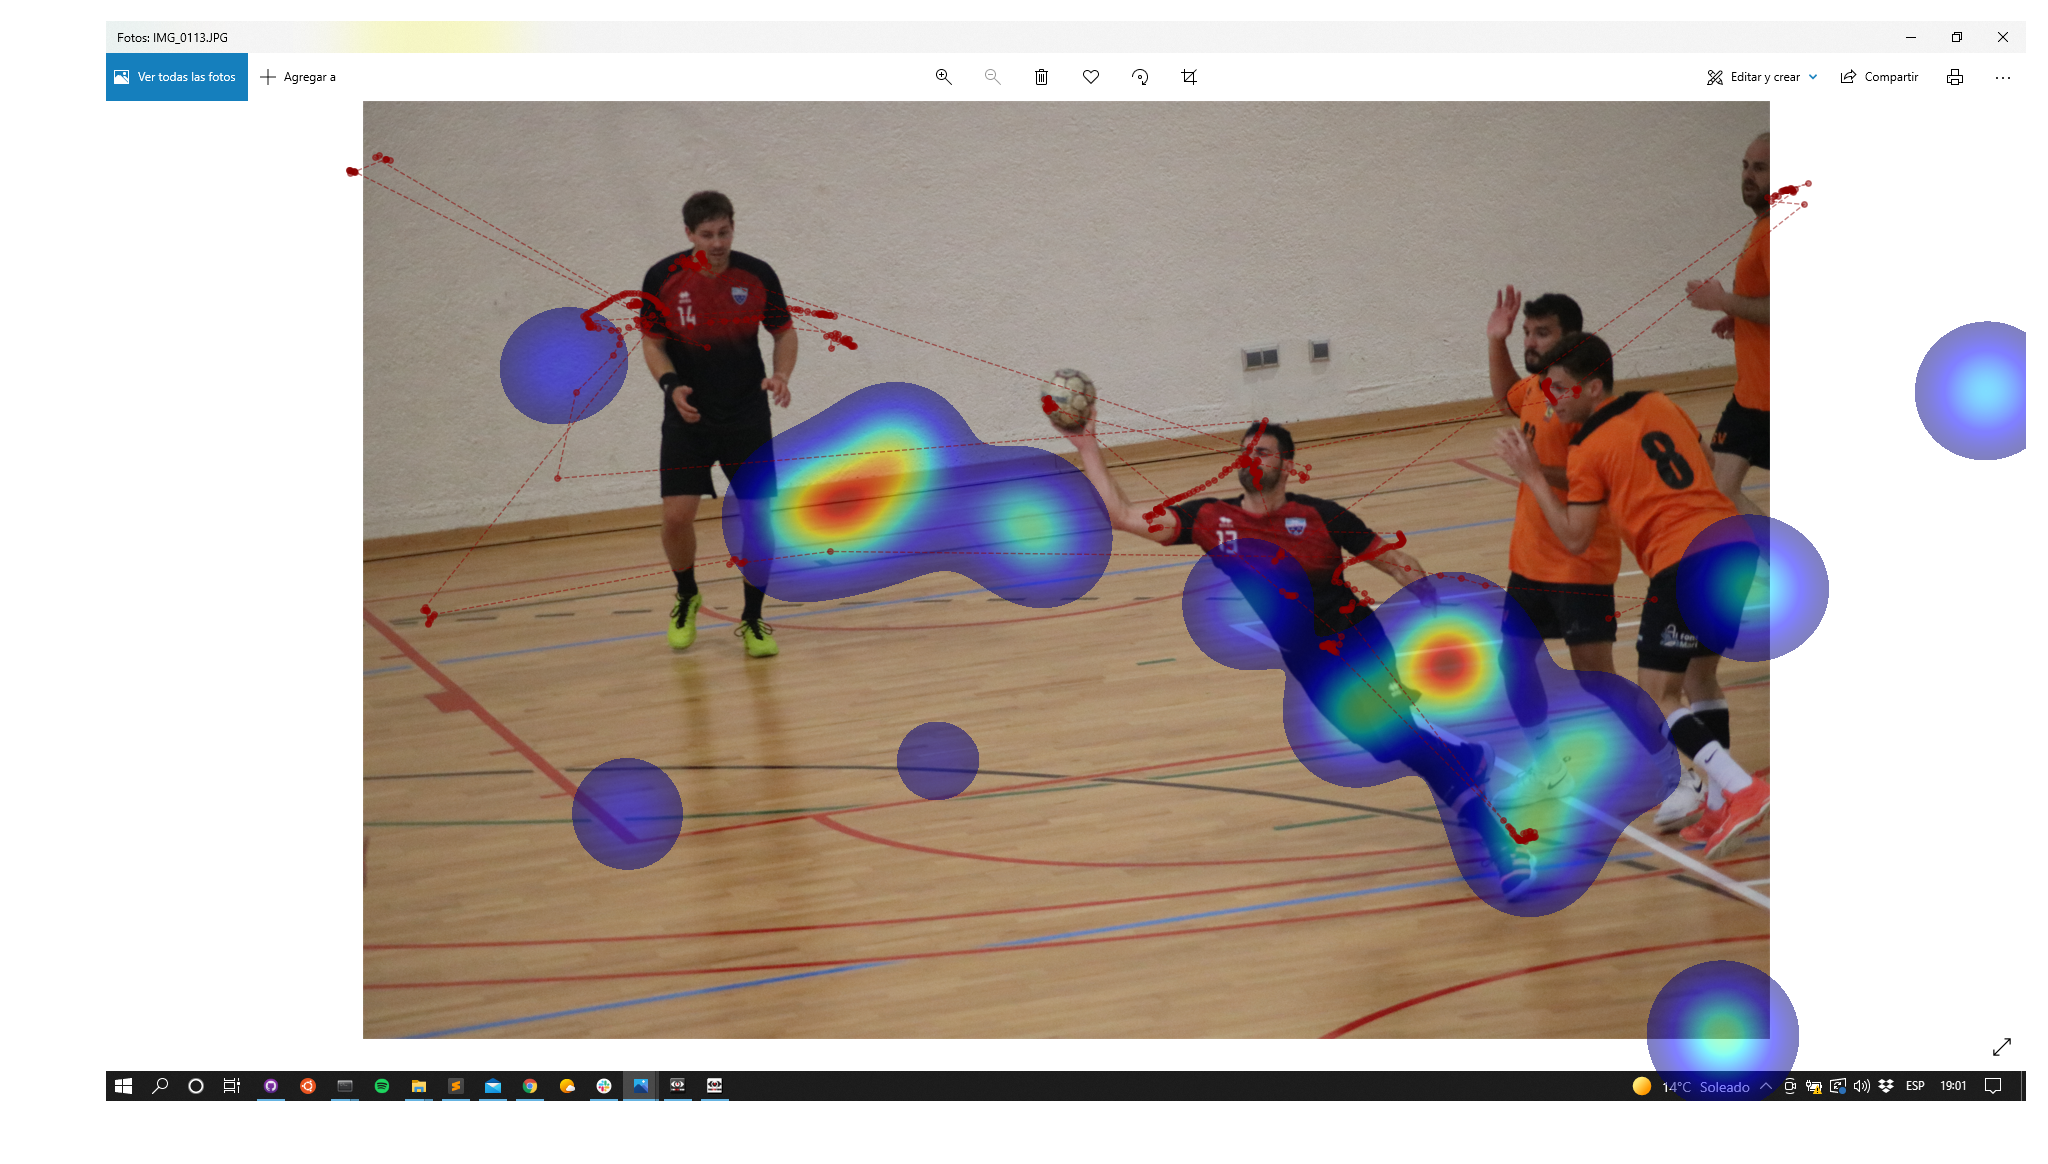

In [219]:
input_path = 'file_positions.csv'
display_width = 1920
display_height = 1080
alpha = 0.5
output_name = 'output_img.png'
background_image = 'seen2.png'
ngaussian = 400 #200
sd = 33


draw_heatmap(df_csv, (display_width, display_height), alpha=alpha, savefilename=None, imagefile=background_image, gaussianwh=ngaussian, gaussiansd=sd)



array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

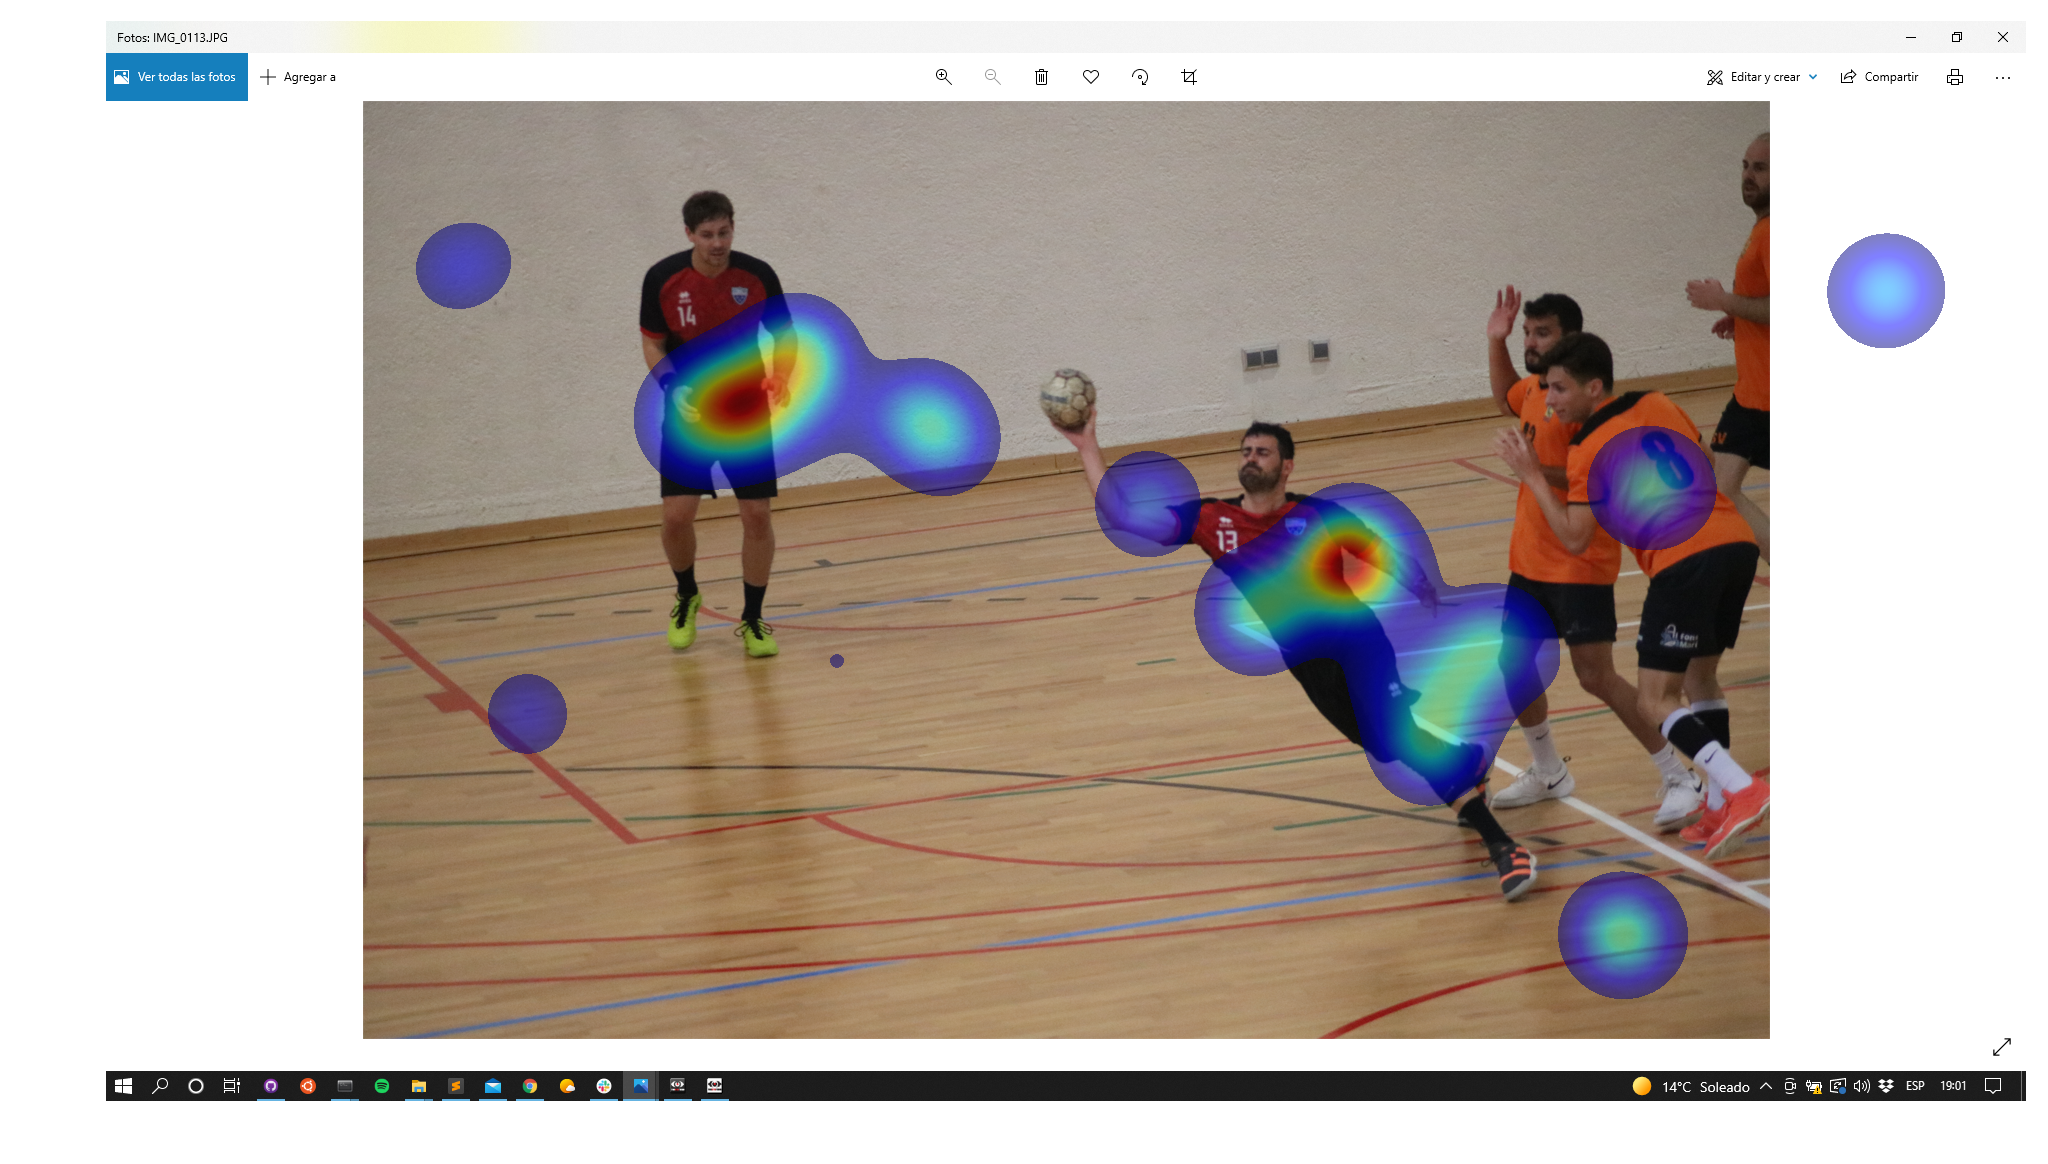

In [176]:
input_path = 'file_positions.csv'
display_width = 1920
display_height = 1080
alpha = 0.5
output_name = 'output_img.png'
background_image = 'seen2.png'
ngaussian = 200
sd = 33


draw_heatmap(Gaze_data, (display_width, display_height), alpha=alpha, savefilename=None, imagefile=background_image, gaussianwh=ngaussian, gaussiansd=sd)

In [ ]:
python gazeheatplot.py file_positions.csv 1920 1080 [-a 0.6] [-o heatmap-gazes] [-b seen2.png] [-n 200] [-sd 33]


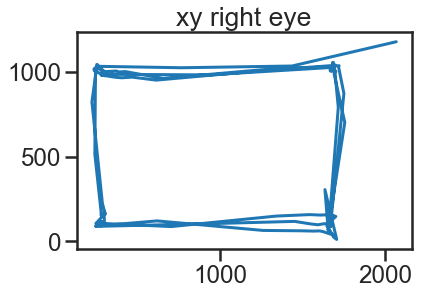

In [262]:
plt.title('xy right eye')
plt.plot(df.x, df.y)

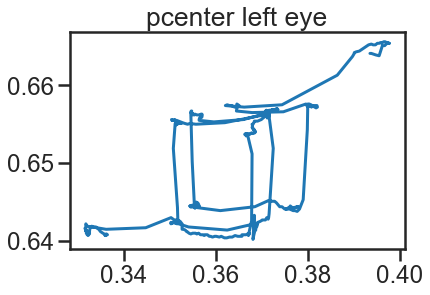

In [258]:
plt.title('pcenter left eye')
plt.plot(df.x, df.y)

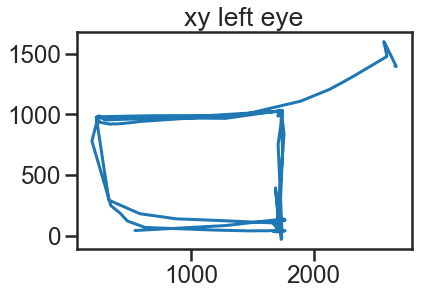

In [253]:
plt.title('xy left eye')
plt.plot(df.x, df.y)

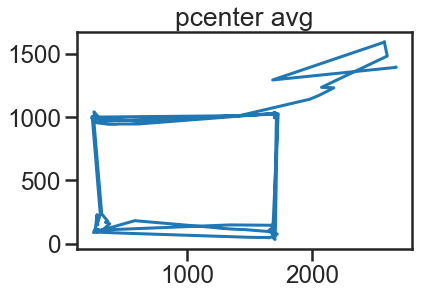

In [219]:
plt.title('xy avg')
plt.plot(df.x, df.y)

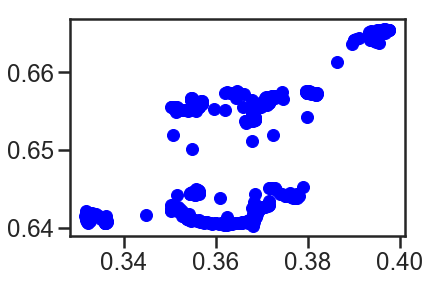

In [158]:
plt.plot(df.x, df.y, 'bo')

In [119]:
dims = (int(1920/100),int(1080/100))

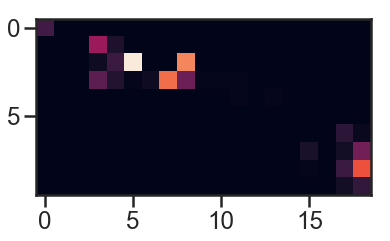

In [120]:
heatmap, xedges, yedges = np.histogram2d(df_.x, df_.y, bins=dims)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [108]:
dims = (df_.x.max(), df_.y.max())

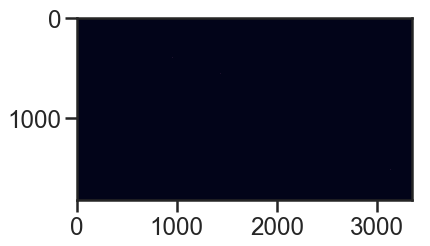

In [109]:
heatmap, xedges, yedges = np.histogram2d(df_.x, df_.y, bins=dims)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [112]:
sum(heatmap[3186:])

array([0., 0., 0., ..., 0., 0., 1.])

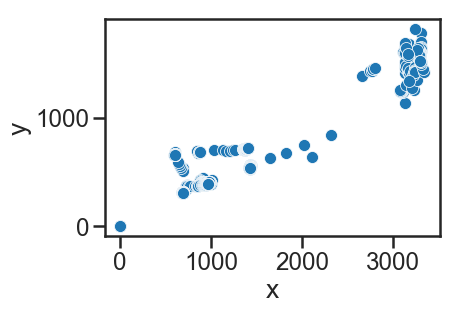

In [88]:
sns.scatterplot(x='x', y='y', data=df_)

In [104]:
df_x

NameError: name 'df_x' is not defined

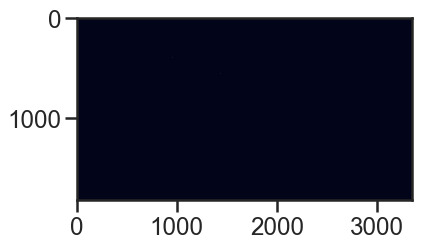

In [98]:

heatmap, xedges, yedges = np.histogram2d(df_.x, df_.y, bins=(3344, 1818))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [102]:
np.shape(heatmap)

(3344, 1818)

In [94]:
print(df_.x.max())
print(df_.y.max())

3344.304
1818.7042


In [81]:
df.iloc[:,-1][0].split(' ')[-1].split('}')[0].split('"')[0]

'16:58:40.802'

In [73]:
float(df.iloc[:,5][0].split(':')[1].split('}')[0])

1360.438

In [53]:
df.head(10)

0              1               2   \
0   {"category":"tracker"  request:"get"  statuscode:200   
1   {"category":"tracker"  request:"get"  statuscode:200   
2   {"category":"tracker"  request:"get"  statuscode:200   
3   {"category":"tracker"  request:"get"  statuscode:200   
4   {"category":"tracker"  request:"get"  statuscode:200   
5   {"category":"tracker"  request:"get"  statuscode:200   
6   {"category":"tracker"  request:"get"  statuscode:200   
7   {"category":"tracker"  request:"get"  statuscode:200   
8   {"category":"tracker"  request:"get"  statuscode:200   
10  {"category":"tracker"  request:"get"  statuscode:200   

                                       3             4          5   \
0   values:{"frame":{"avg":{"x":3192.5493  y:1360.4380}  fix:false   
1   values:{"frame":{"avg":{"x":3188.0786  y:1318.4167}  fix:false   
2   values:{"frame":{"avg":{"x":3186.3933  y:1321.2983}  fix:false   
3   values:{"frame":{"avg":{"x":3130.3647  y:1138.7164}  fix:false   
4   values:{"frame":{"avg":{"x":3107.0664   y:1236.030}  fix:false   
5   values:{"frame":{"avg":{"x":3097.9880  y:1246.9502}  fix:false   
6   values:{"frame":{"avg":{"x":3093.5693  y:1238.3721}  fix:false   
7   values:{"frame":{"avg":{"x":3088.6548  y:1245.3273}  fix:false   
8   values:{"frame":{"avg":{"x":3084.9636  y:1245.3341}   fix:true   
10  values:{"frame":{"avg":{"x":3081.8843  y:1246.8584}   fix:true   

                               6             7                    8   \
0   lefteye:{"avg":{"x":3208.2761  y:1475.5612}  pcenter:{"x":0.4889   
1   lefteye:{"avg":{"x":3206.9280  y:1471.0730}  pcenter:{"x":0.4887   
2   lefteye:{"avg":{"x":3205.0676  y:1470.4415}  pcenter:{"x":0.4885   
3   lefteye:{"avg":{"x":3048.8669  y:1377.8784}  pcenter:{"x":0.4876   
4   lefteye:{"avg":{"x":3071.9919  y:1410.3341}  pcenter:{"x":0.4881   
5   lefteye:{"avg":{"x":3058.8796  y:1412.2914}  pcenter:{"x":0.4886   
6   lefteye:{"avg":{"x":3058.6675  y:1401.1631}  pcenter:{"x":0.4894   
7   lefteye:{"avg":{"x":3058.5828  y:1402.4757}  pcenter:{"x":0.4901   
8   lefteye:{"avg":{"x":3059.1174  y:1398.2651}  pcenter:{"x":0.4909   
10  lefteye:{"avg":{"x":3058.6782  y:1397.1122}  pcenter:{"x":0.4913   

           9   ...                              15            16  \
0   y:0.5135}  ...  righteye:{"avg":{"x":3162.4949  y:1158.6604}   
1   y:0.5137}  ...  righteye:{"avg":{"x":3170.5042  y:1153.1619}   
2   y:0.5138}  ...  righteye:{"avg":{"x":3164.4788  y:1146.2719}   
3   y:0.5131}  ...  righteye:{"avg":{"x":3130.3647  y:1138.7164}   
4   y:0.5132}  ...  righteye:{"avg":{"x":3114.5413  y:1132.6543}   
5   y:0.5131}  ...  righteye:{"avg":{"x":3100.5928  y:1128.4816}   
6   y:0.5127}  ...  righteye:{"avg":{"x":3090.4946  y:1128.6182}   
7   y:0.5128}  ...  righteye:{"avg":{"x":3081.9736  y:1129.6149}   
8   y:0.5126}  ...  righteye:{"avg":{"x":3074.1208  y:1127.2998}   
10  y:0.5124}  ...  righteye:{"avg":{"x":3070.6343  y:1126.5854}   

                     17         18             19                  20  \
0   pcenter:{"x":0.6350  y:0.5604}  psize:18.7045  raw:{"x":3162.4949   
1   pcenter:{"x":0.6348  y:0.5605}  psize:18.7830  raw:{"x":3178.4932   
2   pcenter:{"x":0.6345  y:0.5606}  psize:18.8117  raw:{"x":3152.4631   
3   pcenter:{"x":0.6337   y:0.560}  psize:19.0406  raw:{"x":3029.2817   
4   pcenter:{"x":0.6339  y:0.5601}  psize:19.2129   raw:{"x":3053.510   
5   pcenter:{"x":0.6342  y:0.5603}  psize:19.2484  raw:{"x":3034.5881   
6   pcenter:{"x":0.6347  y:0.5605}  psize:19.4785   raw:{"x":3034.960   
7   pcenter:{"x":0.6353  y:0.5608}  psize:19.7932  raw:{"x":3028.9302   
8   pcenter:{"x":0.6358  y:0.5610}  psize:19.6888  raw:{"x":3019.8137   
10  pcenter:{"x":0.6363  y:0.5612}  psize:19.8574  raw:{"x":3047.3286   

               21       22              23  \
0   y:1158.6604}}  state:7  time:745846434   
1   y:1147.6772}}  state:7  time:745846468   
2   y:1132.6069}}  state:7  time:745846501   
3   y:1116.4486}}  state:7  time:745846534   
4   y:1109.2177

In [52]:
df.iloc[9]

0                      {"category":"tracker"
1                              request:"get"
2                             statuscode:200
3      values:{"frame":{"avg":{"x":3081.8843
4                               y:1246.8584}
5                                   fix:true
6              lefteye:{"avg":{"x":3058.6782
7                               y:1397.1122}
8                        pcenter:{"x":0.4913
9                                  y:0.5124}
10                             psize:19.5989
11                        raw:{"x":3056.5818
12                             y:1391.8253}}
13                        raw:{"x":3051.9551
14                              y:1256.7532}
15            righteye:{"avg":{"x":3070.6343
16                              y:1126.5854}
17                       pcenter:{"x":0.6363
18                                 y:0.5612}
19                             psize:19.8574
20                        raw:{"x":3047.3286
21                             y:1121.6810}}
22        

In [50]:
print(len(df))

418


In [51]:
for i in range(len(df)):
    x = df.iloc[:,3][i].split(':')[-1]
    print(i, x)


0 3192.5493
1 3188.0786
2 3186.3933
3 3130.3647
4 3107.0664
5 3097.9880
6 3093.5693
7 3088.6548
8 3084.9636


KeyError: 9

In [32]:
data.head(10)

0                1               2   \
0    {"category":"tracker"    request:"get"  statuscode:200   
1    {"category":"tracker"    request:"get"  statuscode:200   
2    {"category":"tracker"    request:"get"  statuscode:200   
3    {"category":"tracker"    request:"get"  statuscode:200   
4    {"category":"tracker"    request:"get"  statuscode:200   
5    {"category":"tracker"    request:"get"  statuscode:200   
6    {"category":"tracker"    request:"get"  statuscode:200   
7    {"category":"tracker"    request:"get"  statuscode:200   
8    {"category":"tracker"    request:"get"  statuscode:200   
9  {"category":"heartbeat"  statuscode:200}             NaN   

                                      3             4          5   \
0  values:{"frame":{"avg":{"x":3192.5493  y:1360.4380}  fix:false   
1  values:{"frame":{"avg":{"x":3188.0786  y:1318.4167}  fix:false   
2  values:{"frame":{"avg":{"x":3186.3933  y:1321.2983}  fix:false   
3  values:{"frame":{"avg":{"x":3130.3647  y:1138.7164}  fix:false   
4  values:{"frame":{"avg":{"x":3107.0664   y:1236.030}  fix:false   
5  values:{"frame":{"avg":{"x":3097.9880  y:1246.9502}  fix:false   
6  values:{"frame":{"avg":{"x":3093.5693  y:1238.3721}  fix:false   
7  values:{"frame":{"avg":{"x":3088.6548  y:1245.3273}  fix:false   
8  values:{"frame":{"avg":{"x":3084.9636  y:1245.3341}   fix:true   
9                                    NaN           NaN        NaN   

                              6             7                    8   \
0  lefteye:{"avg":{"x":3208.2761  y:1475.5612}  pcenter:{"x":0.4889   
1  lefteye:{"avg":{"x":3206.9280  y:1471.0730}  pcenter:{"x":0.4887   
2  lefteye:{"avg":{"x":3205.0676  y:1470.4415}  pcenter:{"x":0.4885   
3  lefteye:{"avg":{"x":3048.8669  y:1377.8784}  pcenter:{"x":0.4876   
4  lefteye:{"avg":{"x":3071.9919  y:1410.3341}  pcenter:{"x":0.4881   
5  lefteye:{"avg":{"x":3058.8796  y:1412.2914}  pcenter:{"x":0.4886   
6  lefteye:{"avg":{"x":3058.6675  y:1401.1631}  pcenter:{"x":0.4894   
7  lefteye:{"avg":{"x":3058.5828  y:1402.4757}  pcenter:{"x":0.4901   
8  lefteye:{"avg":{"x":3059.1174  y:1398.2651}  pcenter:{"x":0.4909   
9                            NaN           NaN                  NaN   

          9   ...                              15            16  \
0  y:0.5135}  ...  righteye:{"avg":{"x":3162.4949  y:1158.6604}   
1  y:0.5137}  ...  righteye:{"avg":{"x":3170.5042  y:1153.1619}   
2  y:0.5138}  ...  righteye:{"avg":{"x":3164.4788  y:1146.2719}   
3  y:0.5131}  ...  righteye:{"avg":{"x":3130.3647  y:1138.7164}   
4  y:0.5132}  ...  righteye:{"avg":{"x":3114.5413  y:1132.6543}   
5  y:0.5131}  ...  righteye:{"avg":{"x":3100.5928  y:1128.4816}   
6  y:0.5127}  ...  righteye:{"avg":{"x":3090.4946  y:1128.6182}   
7  y:0.5128}  ...  righteye:{"avg":{"x":3081.9736  y:1129.6149}   
8  y:0.5126}  ...  righteye:{"avg":{"x":3074.1208  y:1127.2998}   
9        NaN  ...                             NaN           NaN   

                    17         18             19                  20  \
0  pcenter:{"x":0.6350  y:0.5604}  psize:18.7045  raw:{"x":3162.4949   
1  pcenter:{"x":0.6348  y:0.5605}  psize:18.7830  raw:{"x":3178.4932   
2  pcenter:{"x":0.6345  y:0.5606}  psize:18.8117  raw:{"x":3152.4631   
3  pcenter:{"x":0.6337   y:0.560}  psize:19.0406  raw:{"x":3029.2817   
4  pcenter:{"x":0.6339  y:0.5601}  psize:19.2129   raw:{"x":3053.510   
5  pcenter:{"x":0.6342  y:0.5603}  psize:19.2484  raw:{"x":3034.5881   
6  pcenter:{"x":0.6347  y:0.5605}  psize:19.4785   raw:{"x":3034.960   
7  pcenter:{"x":0.6353  y:0.5608}  psize:19.7932  raw:{"x":3028.9302   
8  pcenter:{"x":0.6358  y:0.5610}  psize:19.6888  raw:{"x":3019.8137   
9                  NaN        NaN            NaN                 NaN   

              21       22              23  \
0  y:1158.6604}}  state:7  time:745846434   
1  y:1147.6772}}  state:7  time:745846468   
2  y:1132.6069}}  state:7  time:745846501   
3  y:1116.4486}}  state:7  time:745846534   
4  y:1109.2177}}  state:7  time:

In [42]:
data[data.iloc[:,2]=='statuscode:200']

418

In [41]:
data.iloc[:,2].unique()

array(['statuscode:200', nan], dtype=object)

In [45]:
data.iloc[:,2].unique()

array(['statuscode:200', nan], dtype=object)

In [46]:
len(data)

462

In [28]:
np.isnan(data.iloc[:,3])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
for i in range(len(data)):
    x = data.iloc[:,3][i].split(':')[-1]
    print(i, x)



0 3192.5493
1 3188.0786
2 3186.3933
3 3130.3647
4 3107.0664
5 3097.9880
6 3093.5693
7 3088.6548
8 3084.9636


AttributeError: 'float' object has no attribute 'split'

In [6]:
import os
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\OpenBrains\\Eyetraker'

AttributeError: module 'io' has no attribute 'path'

In [8]:
file ='C:\\Users\\David\\Desktop\\recordings.txt'
data = np.loadtxt(file, delimiter=',')

ValueError: could not convert string to float: '{"category":"tracker"'